In [185]:
##1  Project: Investigating Airplane crashes Dataset(Team Vispy)
##    1.1  Table of Contents
    
##Introduction
##Data Wrangling
##Exploratory Data Analysis
##Conclusions



In [186]:
##1.2  Introduction
##This data set contains information about airplane crashes collected from kaggle website data collections, including fatalities,aboard,date,time,operators.

##In this first step, I’ll import the necessary libraries to import the data. After that, I’ll perform some basic commands to understand the structure of the data.

##This analysis looks at two major questions;

##How many plane crashes yearly?
##How many people were on board?
##How many survivors were recorded?

In [187]:
#importing numpy and pandas libraries to read the data
import pandas as pd
import numpy as np

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as sts

In [188]:
## Data Wrangling

##> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for my analysis. 



In [189]:
Aircrash_data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
Aircrash_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [190]:
#Some summary statistics for the dataset
#Using describe, I’ll see whether there is any sudden jump in the data’s values.
Aircrash_data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [191]:
#Info on the dataset.
#Using the info to see whether there are any null values in the data. so I can manipulate the data and drop what we will not be using.

Aircrash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [192]:
Aircrash_data.shape

(5268, 13)

In [193]:
#looking for missing values
Aircrash_data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [194]:
Aircrash_data['Fatalities'].fillna(0, inplace = True)
Aircrash_data['Aboard'].fillna(0, inplace = True)
Aircrash_data['Ground'].fillna(0, inplace = True)

In [195]:
Aircrash_data['Date'] = pd.to_datetime(Aircrash_data['Date'])
Aircrash_data['Date'] = Aircrash_data['Date'].dt.strftime("%m/%d/%Y")
Aircrash_data['Date'].head(5)

0    09/17/1908
1    07/12/1912
2    08/06/1913
3    09/09/1913
4    10/17/1913
Name: Date, dtype: object

In [196]:
Aircrash_data['Year'] = pd.DatetimeIndex(Aircrash_data['Date']).year
Aircrash_data['Year'].head(5)

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [197]:
Aircrash_data['Survived'] = Aircrash_data['Aboard'] - Aircrash_data['Fatalities']
Aircrash_data['Survived'].fillna(0, inplace = True)

In [198]:
Aircrash_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


In [199]:
#Exploratory Data Analysis

##> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


In [200]:
total_crashes_year = Aircrash_data[['Year', 'Date']].groupby('Year').count()
total_crashes_year = total_crashes_year.reset_index()
total_crashes_year.columns = ['Year', 'Crashes']


Text(0.5, 0, '')

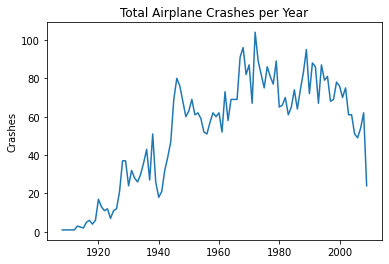

In [201]:
sns.lineplot(x = 'Year', y = 'Crashes', data = total_crashes_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('')

In [202]:
pcdeaths_year = Aircrash_data[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths_year.reset_index(inplace = True)

Text(0.5, 0, '')

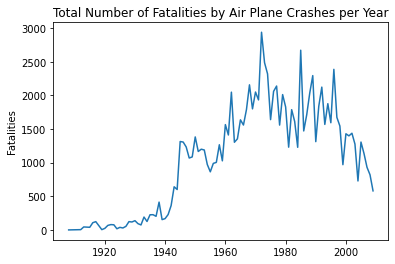

In [203]:
sns.lineplot(x = 'Year', y = 'Fatalities', data = pcdeaths_year)
plt.title('Total Number of Fatalities by Air Plane Crashes per Year')
plt.xlabel('')

In [204]:
abrd_per_year = Aircrash_data[['Year', 'Aboard']].groupby('Year').sum()
abrd_per_year = abrd_per_year.reset_index()

Text(0, 0.5, 'Count')

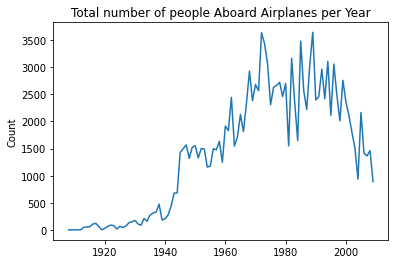

In [205]:
sns.lineplot(x = 'Year', y = 'Aboard', data = abrd_per_year)
plt.title('Total number of people Aboard Airplanes per Year')
plt.xlabel('')
plt.ylabel('Count')

In [206]:
a = sts.pearsonr(Aircrash_data.Fatalities, Aircrash_data.Aboard)
b = sts.spearmanr(Aircrash_data.Fatalities, Aircrash_data.Aboard)
print ('Pearson Correlation constant : ',a[0],'\nSpearman Correlation constant : ',b[0])

Pearson Correlation constant :  0.7569242287226606 
Spearman Correlation constant :  0.7729747858599402


In [207]:
FSG_per_year = Aircrash_data[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5, 1.0, 'Fatalities vs Survived vs Killed on Ground per Year')

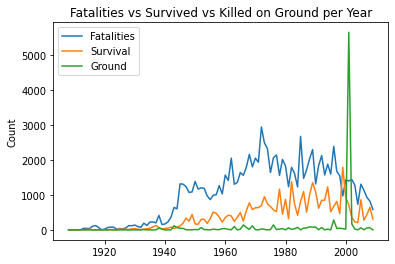

In [208]:
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year)
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')

In [209]:
Aircrash_data[Aircrash_data['Ground'] == Aircrash_data['Ground'].max()]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
4803,09/11/2001,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0


In [210]:
df = Aircrash_data
df['Operator'] = df['Operator'].str.lower()

In [211]:
df['Military'] = df['Operator'].str.contains('military')

In [212]:
df.groupby(['Military']).count()['Date']

Military
False    4469
True      781
Name: Date, dtype: int64

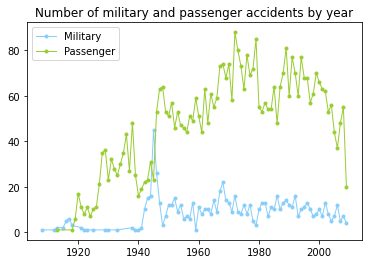

In [213]:
dfm = df[df['Military'] == True]
dfp = df[df['Military'] == False]

dfm = pd.DataFrame(dfm.groupby('Year').count()['Date'])
dfm.sort_values('Year',inplace=True)
dfm.reset_index(inplace = True)
dfm.columns = ['Year','Military']

dfp = pd.DataFrame(dfp.groupby('Year').count()['Date'])
dfp.sort_values('Year',inplace=True)
dfp.reset_index(inplace = True)
dfp.columns = ['Year','Passenger']

plt.plot(dfm['Year'], dfm['Military'], label = 'Military', color='lightskyblue', marker = ".", linewidth=1)
plt.plot(dfp['Year'], dfp['Passenger'], label = 'Passenger', color='yellowgreen', marker = ".", linewidth=1)
plt.legend()
plt.title('Number of military and passenger accidents by year')
plt.show()

Operator Analysis

In [214]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Military
0,09/17/1908,17:18,"Fort Myer, Virginia",military - u.s. army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,True
1,07/12/1912,06:30,"AtlantiCity, New Jersey",military - u.s. navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,True
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0,False
3,09/09/1913,18:30,Over the North Sea,military - german navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0,True
4,10/17/1913,10:30,"Near Johannisthal, Germany",military - german navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0,True


In [221]:
df['Operator'] = df['Operator'].str.upper()

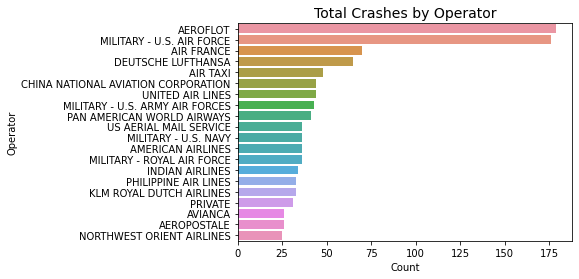

In [239]:
op = df.groupby('Operator')[['Operator']].count()
op.rename(columns = {"Operator" : "Count"}, inplace= True)
op = op.sort_values('Count', ascending = False).head(20)

sns.barplot (y = op.index, x = "Count", data = op, orient='h')
plt.title('Total Crashes by Operator', loc='Center', fontsize=14)
plt.show()

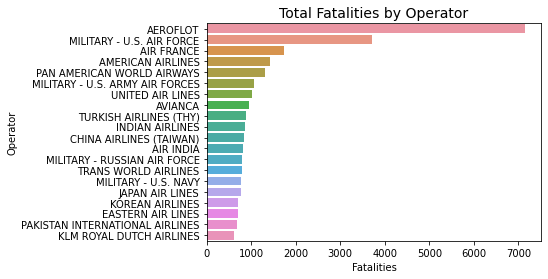

In [273]:
op = df.groupby('Operator').sum() ['Fatalities']
op = op.sort_values(ascending = False)
op = pd.DataFrame (data = op.head(20))

sns.barplot (y = op.index, x = "Fatalities", data = op, orient='h')
plt.title('Total Fatalities by Operator', loc='Center', fontsize=14)
plt.show()